<h3>Tutorial notebook for:</h3>

 - Loading datasets
 - Training standard Logistic Regression (LR) models from *sklearn*
 - Training standard XGBoost (XGB) models from *xgboost*
 - Training PyTorch Deep Neural Network (DNN) models as constructed in *models.py*

# Preamble

In [1]:
import os
os.getcwd()  # this notebook should be at the root level

'/home/dan-ley/icml-gces'

# Load Dataset

In [2]:
bold = lambda x: '\033[1m' + x + '\033[0m'

In [3]:
from datasets import dataset_loader
from models import performance
print(bold('Dataset Names: ') + ', '.join(dataset_loader().datasets.keys()))

Dataset Names: compas, german_credit, adult_income, default_credit, heloc


In [5]:
name = 'heloc'
dropped_features = []
# drop continuous features with:
# dataset_loader().continuous_features[dataset]
dataset = dataset_loader(name, dropped_features=dropped_features, n_bins=None)
print(bold('{} Dataset:'.format(name.replace('_', ' ').title())))
dataset.data

Heloc Dataset:


,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,...,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance,RiskPerformance
0,55.0,144.0,4,84,20,3,0,83,2.0,3,...,0.0,0,0,33.0,74.0,8.0,1.0,1.0,69.0,0
1,61.0,58.0,15,41,2,4,4,100,15.0,0,...,0.0,0,0,0.0,74.0,0.0,2.0,1.0,0.0,0
2,67.0,66.0,5,24,9,0,0,100,15.0,7,...,0.0,4,4,53.0,66.0,4.0,2.0,1.0,86.0,0
3,66.0,169.0,1,73,28,1,1,93,76.0,6,...,0.0,5,4,72.0,83.0,6.0,4.0,3.0,91.0,0
4,81.0,333.0,27,132,12,0,0,100,15.0,7,...,0.0,1,1,51.0,89.0,3.0,1.0,0.0,80.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10454,73.0,131.0,5,57,21,0,0,95,80.0,6,...,7.0,0,0,26.0,74.0,5.0,2.0,0.0,100.0,1
10455,65.0,147.0,39,68,11,0,0,92,28.0,6,...,1.0,1,1,86.0,53.0,2.0,2.0,1.0,80.0,0
10456,74.0,129.0,6,64,18,1,1,100,15.0,6,...,3.0,4,4,6.0,74.0,5.0,2.0,0.0,56.0,0
10457,72.0,234.0,12,113,42,2,2,96,35.0,6,...,6.0,0,0,19.0,74.0,4.0,1.0,0.0,38.0,0


In [6]:
# Inspect features
features = dataset.features[:-1]
print(*zip(range(len(features)-1), features[:-1]), sep='\n')

(0, 'ExternalRiskEstimate')
(1, 'MSinceOldestTradeOpen')
(2, 'MSinceMostRecentTradeOpen')
(3, 'AverageMInFile')
(4, 'NumSatisfactoryTrades')
(5, 'NumTrades60Ever2DerogPubRec')
(6, 'NumTrades90Ever2DerogPubRec')
(7, 'PercentTradesNeverDelq')
(8, 'MSinceMostRecentDelq')
(9, 'MaxDelq2PublicRecLast12M')
(10, 'MaxDelqEver')
(11, 'NumTotalTrades')
(12, 'NumTradesOpeninLast12M')
(13, 'PercentInstallTrades')
(14, 'MSinceMostRecentInqexcl7days')
(15, 'NumInqLast6M')
(16, 'NumInqLast6Mexcl7days')
(17, 'NetFractionRevolvingBurden')
(18, 'NetFractionInstallBurden')
(19, 'NumRevolvingTradesWBalance')
(20, 'NumInstallTradesWBalance')
(21, 'NumBank2NatlTradesWHighUtilization')


# Logistic Regression

In [7]:
from models import lr_normalisers, lr_class_weights, lr_max_iters
x_train, y_train, x_test, y_test, x_means, x_stds =\
dataset.get_split(normalise=lr_normalisers[name], shuffle=False,  # do not shuffle, important for repeatability
                  return_mean_std=True, print_outputs=True)
normalise = [x_means, x_stds] if lr_normalisers[name] else None

Proportion of 1s in Training Data: 70.12%
Proportion of 1s in Test Data: 69.5%


In [8]:
from sklearn.linear_model import LogisticRegression  
print("\033[1mDataset:\033[0m {}\n".format(name.replace('_', ' ').title()))
B = LogisticRegression(max_iter=lr_max_iters[name], class_weight=lr_class_weights[name])
B.fit(x_train, y_train)
B_name = 'lr'
performance(B, x_train, x_test, y_train, y_test, normalise=None)  # already normalised where necessary

norm = False if normalise is None else True
print("\n\033[1mNormalise:\033[0m {}".format(norm))
x_aff_size = (1-B.predict(x_train)).sum()
x_size = x_train.shape[0]
y_aff_size = (1-y_train).astype(int).sum()
print("\033[1mDNN Negative Predictions (Train):\033[0m {}% ({} Inputs out of {})"\
      .format(round(x_aff_size/x_size*100, 2), x_aff_size, x_size))
print("\033[1mData Negative Predictions (Train):\033[0m {}% ({} Inputs out of {})"\
      .format(round(y_aff_size/x_size*100, 2), y_aff_size, x_size))

Dataset: German Credit

Train Accuracy: 78.88%
Test Accuracy: 75.5%
Proportion of 1s Predicted (Train): 77.5%
Proportion of 1s Predicted (Test): 71.0%

Normalise: False
DNN Negative Predictions (Train): 22.5% (180 Inputs out of 800)
Data Negative Predictions (Train): 29.88% (239 Inputs out of 800)


In [9]:
if False:  # replace False with True to save model in the desired location
    with open('models/{}_{}.pkl'.format(name, B_name), 'wb') as f:
        pickle.dump(B, f)

# XGBoost

In [7]:
from xgboost import XGBClassifier
from models import xgb_depths, xgb_estimators, xgb_regularizers, xgb_learning_rates, xgb_colsamples

x_train, y_train, x_test, y_test, x_means, x_stds =\
dataset.get_split(normalise=False, shuffle=False,  # do not shuffle, important for repeatability
                  return_mean_std=True, print_outputs=True)

# alternatively compute best params per dataset using grid search (below)
gamma, reg_alpha, reg_lambda = xgb_regularizers[name]
best_params = {'max_depth': xgb_depths[name], 'n_estimators': xgb_estimators[name],
               'gamma': gamma, 'reg_alpha': reg_alpha, 'reg_lambda': reg_lambda,
               'learning_rate': xgb_learning_rates[name], 'colsample_bytree': xgb_colsamples[name]}

Proportion of 1s in Training Data: 47.19%
Proportion of 1s in Test Data: 51.09%


In [9]:
print(bold("Dataset:") + " {}\n".format(name.replace('_', ' ').title()))

B = XGBClassifier(**best_params)
B.fit(x_train, y_train)
B_name = 'xgb'
performance(B, x_train, x_test, y_train, y_test, normalise=None)  # no normalisation in xgb
normalise = None

norm = False if normalise is None else True
print("\n\033[1mNormalise:\033[0m {}".format(norm))
x_aff_size = (1-B.predict(x_train)).sum()
x_size = x_train.shape[0]
y_aff_size = (1-y_train).astype(int).sum()
print("\033[1mDNN Negative Predictions (Train):\033[0m {}% ({} Inputs out of {})"\
      .format(round(x_aff_size/x_size*100, 2), x_aff_size, x_size))
print("\033[1mData Negative Predictions (Train):\033[0m {}% ({} Inputs out of {})"\
      .format(round(y_aff_size/x_size*100, 2), y_aff_size, x_size))

Dataset: Heloc

Train Accuracy: 77.22%
Test Accuracy: 73.77%
Proportion of 1s Predicted (Train): 45.25%
Proportion of 1s Predicted (Test): 46.63%

Normalise: False
DNN Negative Predictions (Train): 54.75% (4323 Inputs out of 7896)
Data Negative Predictions (Train): 52.81% (4170 Inputs out of 7896)


In [10]:
if False:  # replace False with True to save model in the desired location
    with open('models/{}_{}.pkl'.format(name, B_name), 'wb') as f:
        pickle.dump(B, f)

In [11]:
B

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=4, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.3, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

### Grid Search (Used to find the hyperparameters stored in models.py)

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'max_depth': [3,6,10],
          'learning_rate': [0.01, 0.1, 0.5],
          'n_estimators': [100, 500, 1000],
          'colsample_bytree': [0.3, 0.7]}
xgbr = XGBClassifier(seed = 20)
clf = GridSearchCV(estimator=xgbr, param_grid=params,
                   scoring='neg_mean_squared_error', verbose=1)
clf.fit(x_train, y_train)

In [ ]:
B = XGBClassifier(**clf.best_params_)
B.fit(x_train, y_train)

In [ ]:
performance(B, x_train, x_test, y_train, y_test, normalise=False)

# DNN

In [14]:
import torch
from models import dnn_normalisers, dnn_batch_sizes, dnn_input_output_dims,\
dnn_widths_depths, dnn_dropouts, dnn_criteria, dnn_learning_rates,\
dnn_weight_decays, dnn_num_epochs
normalise = True#dnn_normalisers[name]  # set to True if necessary for model performance
batch_size = dnn_batch_sizes[name]
print("\033[1mDataset:\033[0m {}".format(name.replace('_', ' ').title()))
print("\033[1mNormalise:\033[0m {}".format(normalise))
print("\033[1mBatch Size:\033[0m {}".format(batch_size))

Dataset: German Credit
Normalise: True
Batch Size: 128


In [15]:
normalise = dnn_normalisers[name]
x_train, y_train, x_test, y_test, x_means, x_stds =\
dataset.get_split(normalise=normalise, shuffle=False,  # do not shuffle, important for repeatability
                  return_mean_std=True, print_outputs=True)

Proportion of 1s in Training Data: 70.12%
Proportion of 1s in Test Data: 69.5%


### Construct DNN

In [16]:
from models import DNN

# Hyperparameters 
input_dim, output_dim = dnn_input_output_dims[name]
width, depth = dnn_widths_depths[name]
dropout = dnn_dropouts[name]
criterion = dnn_criteria[name]

# Device configuration
cuda = False  # torch.cuda.is_available()
device = 'cuda' if cuda else 'cpu'

torch.manual_seed(0)
B = DNN(input_dim, width, depth, output_dim, dropout=dropout).to(device)

### Train DNN

Number of Epochs = 276
Number of Steps per Epoch = ceil(Length of Trainset / Batch Size) = 7
Epoch [1/276], Step [7/7], Loss: 4.8243, Time: 0.10s
Proportion of 1's predicted: 100.000%
Accuracy of the network on the training set: 70.125%
Proportion of 1's predicted: 100.000%
Accuracy of the network on the test set: 69.5%
Epoch [2/276], Step [7/7], Loss: 4.7892, Time: 0.14s
Proportion of 1's predicted: 100.000%
Accuracy of the network on the training set: 70.125%
Proportion of 1's predicted: 100.000%
Accuracy of the network on the test set: 69.5%
Epoch [3/276], Step [7/7], Loss: 4.7939, Time: 0.17s
Proportion of 1's predicted: 100.000%
Accuracy of the network on the training set: 70.125%
Proportion of 1's predicted: 100.000%
Accuracy of the network on the test set: 69.5%
Epoch [4/276], Step [7/7], Loss: 4.7660, Time: 0.21s
Proportion of 1's predicted: 100.000%
Accuracy of the network on the training set: 70.125%
Proportion of 1's predicted: 100.000%
Accuracy of the network on the test se

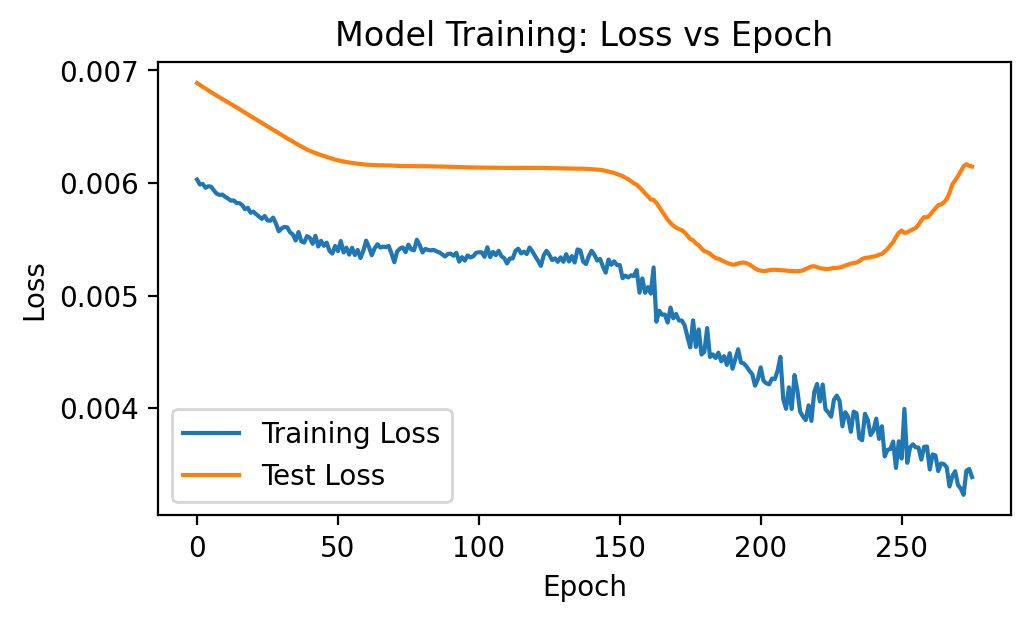

Number of Epochs = 45
Number of Steps per Epoch = ceil(Length of Trainset / Batch Size) = 7
Epoch [1/45], Step [7/7], Loss: 2.6398, Time: 0.06s
Proportion of 1's predicted: 61.250%
Accuracy of the network on the training set: 86.625%
Proportion of 1's predicted: 67.000%
Accuracy of the network on the test set: 75.5%
Epoch [2/45], Step [7/7], Loss: 2.5820, Time: 0.12s
Proportion of 1's predicted: 60.875%
Accuracy of the network on the training set: 86.5%
Proportion of 1's predicted: 66.500%
Accuracy of the network on the test set: 75.0%
Epoch [3/45], Step [7/7], Loss: 2.6867, Time: 0.16s
Proportion of 1's predicted: 60.500%
Accuracy of the network on the training set: 86.625%
Proportion of 1's predicted: 65.000%
Accuracy of the network on the test set: 75.5%
Epoch [4/45], Step [7/7], Loss: 2.6111, Time: 0.21s
Proportion of 1's predicted: 59.875%
Accuracy of the network on the training set: 86.0%
Proportion of 1's predicted: 65.000%
Accuracy of the network on the test set: 75.5%
Epoch [5

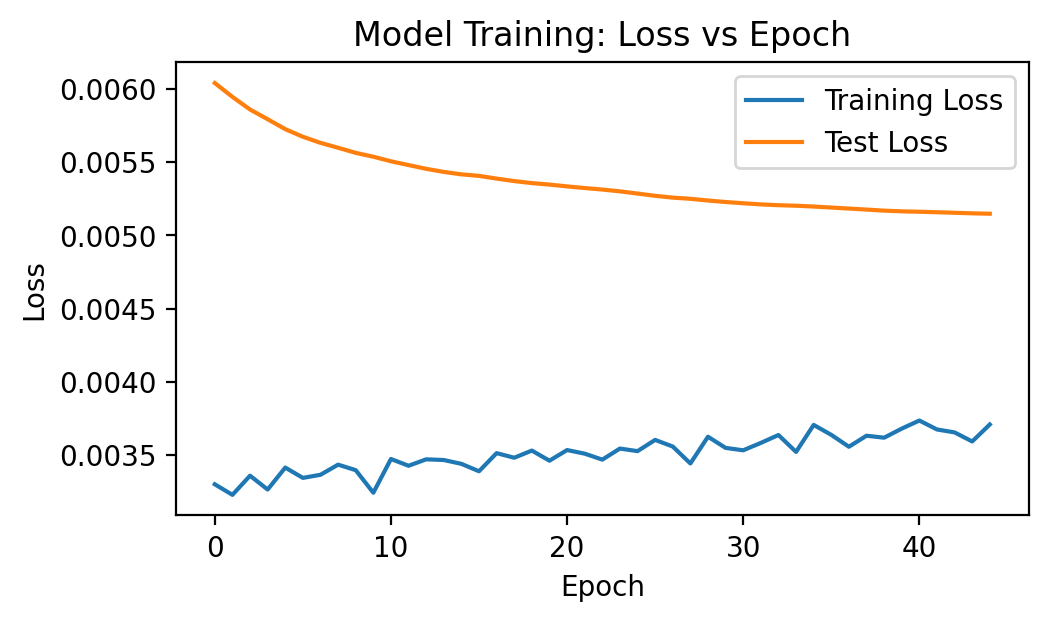

In [17]:
from models import DNN_trainer

inps = torch.from_numpy(x_train).float()
tgts = torch.from_numpy(y_train).float()
train_dataset = torch.utils.data.TensorDataset(inps, tgts)

inps = torch.from_numpy(x_test).float()
tgts = torch.from_numpy(y_test).float()
test_dataset = torch.utils.data.TensorDataset(inps, tgts)


for i, learning_rate in enumerate(dnn_learning_rates[name]):
    # Initialise optimizer
    optimizer = torch.optim.Adam(B.parameters(), lr=learning_rate,
                                 weight_decay=dnn_weight_decays[name][i])

    # Train model
    n_epochs = dnn_num_epochs[name][i]
    trainer = DNN_trainer(B, train_dataset, n_epochs, criterion, optimizer,
                          device, batch_size=batch_size, val_ratio=None,
                          test_dataset=test_dataset)
    B = trainer.train(n_epochs, patience=None, print_outputs=True)

### Assess Model

In [20]:
print("\033[1mDataset:\033[0m {}\n".format(name.replace('_', ' ').title()))

B_name = 'dnn'
performance(B, x_train, x_test, y_train, y_test, normalise=None)  # already normalised where necessary

print("\n\033[1mWidth x Depth:\033[0m {} x {}".format(width, depth))
print("\033[1mNormalise:\033[0m {}".format(normalise))
x_aff_size = (1-B.predict(x_train)).sum()
x_size = x_train.shape[0]
y_aff_size = (1-y_train).astype(int).sum()
print("\033[1mDNN Negative Predictions (Train):\033[0m {}% ({} Inputs out of {})"\
      .format(round(x_aff_size/x_size*100, 2), x_aff_size, x_size))
print("\033[1mData Negative Predictions (Train):\033[0m {}% ({} Inputs out of {})"\
      .format(round(y_aff_size/x_size*100, 2), y_aff_size, x_size))

Dataset: German Credit

Train Accuracy: 83.75%
Test Accuracy: 78.0%
Proportion of 1s Predicted (Train): 69.62%
Proportion of 1s Predicted (Test): 71.5%

Width x Depth: 50 x 10
Normalise: True
DNN Negative Predictions (Train): 30.38% (243 Inputs out of 800)
Data Negative Predictions (Train): 29.88% (239 Inputs out of 800)


### Save Model

In [ ]:
if False:  # replace False with True to save model in the desired location
    with open('models/{}_{}.pkl'.format(name, B_name), 'wb') as f:
        pickle.dump(B, f)